In [3]:
import pandas as pd
from sklearn.metrics import mean_absolute_error as MAE
import xgboost as xgb
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

In [7]:
data = pd.read_csv("Kevin_training.csv", low_memory=False)
data.head()

,day,unique_carrier_rank,tail_num_rank,origin_rank,dest_rank,distance,crs_arr_time,crs_elapsed_time,sdomt_gallons,tdomt_gallons,ts_cost,tdomt_cost,arr_delay
0,1,11,5804,201,279,413.0,20.373333,91.0,53977431.0,53985306.0,142005277.0,114629092.0,12.0
1,3,11,5804,305,279,187.0,13.906667,65.0,53977431.0,53985306.0,142005277.0,114629092.0,3.0
2,4,11,5804,305,279,187.0,8.093333,70.0,53977431.0,53985306.0,142005277.0,114629092.0,-11.0
3,5,11,5804,295,279,867.0,17.200000,135.0,53977431.0,53985306.0,142005277.0,114629092.0,243.0
4,5,11,5804,130,279,369.0,21.493333,80.0,53977431.0,53985306.0,142005277.0,114629092.0,255.0


In [16]:
data_train = data[['day',
 'unique_carrier_rank',
 'tail_num_rank',
 'origin_rank',
 'dest_rank',
 'distance',
 'crs_arr_time',
 'crs_elapsed_time',
 'sdomt_gallons',
 'tdomt_gallons',
 'ts_cost',
 'tdomt_cost']]

In [17]:
X = data_train
y = data['arr_delay']

In [18]:
data_dmatrix = xgb.DMatrix(data=X, label=y)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.2, random_state=123)
xg_reg = xgb.XGBRegressor(objective = 'reg:linear', colsample_bytree = .3, learning_rate=.1, max_depth = 5, alpha=10,
                         n_estimators=10)
xg_reg.fit(X_train, y_train)
y_pred = xg_reg.predict(X_test)
params = {"objective":"reg:linear", 'colsample_bytree':.3, 'learning_rate':.1, 'max_depth':5, 'alpha':10}
cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5, num_boost_round=500, early_stopping_rounds=20, 
                    metrics="rmse", as_pandas=True, seed=123)

[11:04:35] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:04:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:04:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:04:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:04:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1637426408905/work/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[11:04:36] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_16374264089

In [19]:
cv_results.tail()

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
174,48.644849,0.244012,49.906899,0.627893
175,48.640333,0.247977,49.907685,0.628124
176,48.632593,0.246734,49.905914,0.626280
177,48.622024,0.239144,49.905636,0.627241
178,48.609855,0.238951,49.904223,0.628211


In [20]:
print(metrics.r2_score(y_test, y_pred))

0.04460917688888366


In [21]:
from sklearn.metrics import mean_absolute_error as MAE
print(MAE(y_test,y_pred))

24.14009608597857


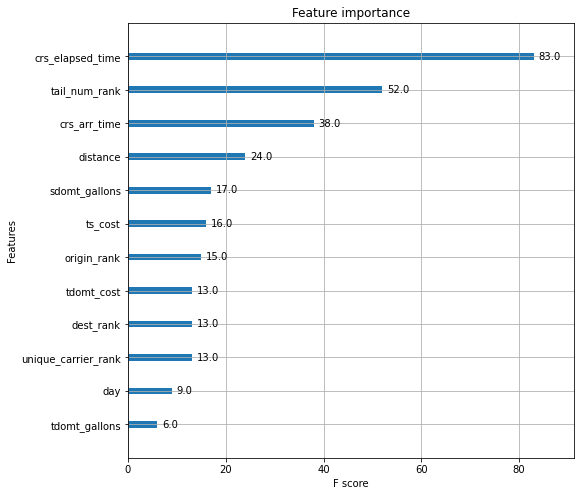

In [22]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [8,8]
plt.show()